<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionales1/blob/main/Semana4/Interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [2]:
X = np.array([-3,-2,-1,0,1,2,3])
Y = np.array([4,5,2,6,8,-10,2])

In [3]:
x_inter = np.linspace(X[0],X[-1],100)
y_inter = np.interp(x_inter,X,Y)

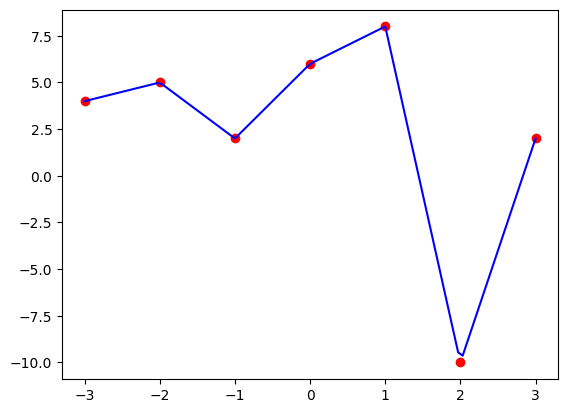

In [4]:
plt.scatter(X,Y,color='r')
plt.plot(x_inter,y_inter,color='b')
plt.show()

In [5]:
def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])

  return L

In [6]:
x = sym.Symbol('x',real=True)
x

x

In [7]:
Lagrange(x,X,0)

-x*(1/4 - x/4)*(2/5 - x/5)*(1/2 - x/6)*(-x - 2)*(-x/2 - 1/2)/3

In [8]:
Lagrange(x,X,1)

-x*(1/3 - x/3)*(1/2 - x/4)*(3/5 - x/5)*(-x - 1)*(x + 3)/2

In [9]:
Lagrange(x,X,0).subs(x,X[1])

0

In [10]:
def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

In [11]:
Interpolate(-2.5,X,Y)

5.416015625

In [12]:
x1 = np.linspace(X[0],X[-1],50)
y1 = Interpolate(x1,X,Y)

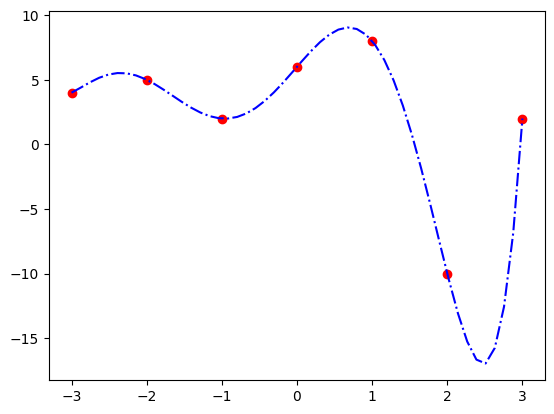

In [13]:
plt.scatter(X,Y,color='r')
#plt.plot(x_inter,y_inter,color='b')
plt.plot(x1,y1,'-.',color='b')
plt.show()

In [14]:
 poly = Interpolate(x,X,Y)
 poly = poly.expand()
 poly

11*x**6/120 + 11*x**5/30 - 5*x**4/6 - 49*x**3/12 - 31*x**2/120 + 403*x/60 + 6

In [15]:
sym.diff(poly,x,1)

11*x**5/20 + 11*x**4/6 - 10*x**3/3 - 49*x**2/4 - 31*x/60 + 403/60

In [16]:
sym.diff(poly,x,5)

22*(3*x + 2)

In [56]:
X = np.array([0,1,2,3])
Y = np.exp(X)

In [79]:
x1 = np.linspace(X[0],X[-1],100)
y1 = Interpolate(x1,X,Y)

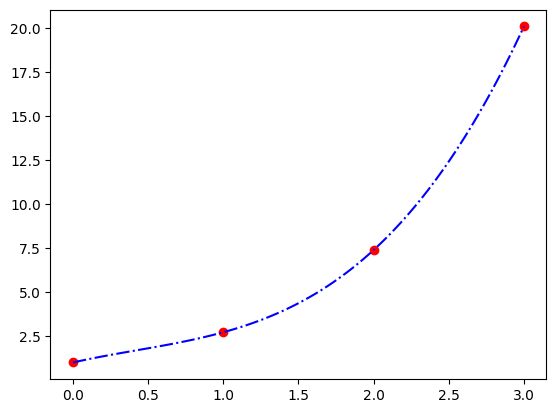

In [80]:
plt.scatter(X,Y,color='r')
plt.plot(x1,y1,'-.',color='b')
plt.show()

In [81]:
estimacion = Interpolate(2.5,X,Y)
real = np.exp(2.5)

In [82]:
np.abs(real-estimacion)

0.23451334914670774

In [125]:
# Debemos encontrar el supremo que define la cota superior de error
funcion = np.exp(x1)
ii = np.where( x1 == np.max(x1) )
cita = x1[ii][0]
cita

3.0

In [126]:
import math

def GetError(x,c):

  E = np.exp(c)/math.factorial(len(X))

  for i in range(len(X)):
    E *= np.abs(x-X[i])

  return E

In [127]:
# Este es error maximo de calcular la exponencial con un polinomio
GetError(2.5,cita)

0.7845912860620183

In [128]:
# Operador derivada de orden super
def f(x):
  return np.sin(x)

In [129]:
def df(f,x,h=1e-1):
  return (-2*f(x-h) -3*f(x) +6*f(x+h)-f(x+2*h))/(6*h)

In [133]:
x = np.linspace(-2*np.pi,2*np.pi,1000)
h = x[1] - x[0]
h

0.012578949563923025

In [134]:
De = np.cos(x)
Dn = df(f,x,h)

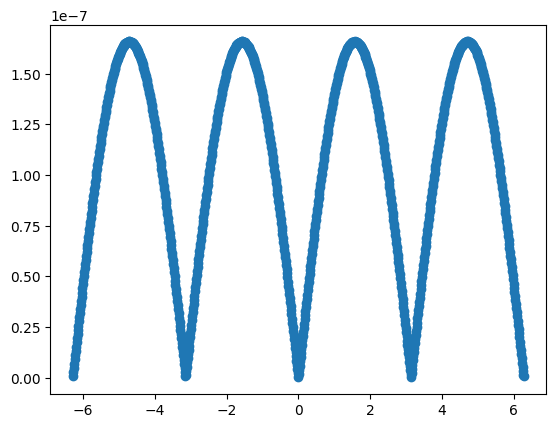

In [135]:
plt.scatter(x,np.abs(De-Dn))